# Solving the n-Queens Problem using Local Search

Student Name: [Christian Melendez]

I have used the following AI tools: [None]

I understand that my submission needs to be my own work: [CM]

## Instructions

Total Points: Undergrads 100 + 5 bonus / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a HTML file.


## The n-Queens Problem

* __Goal:__ Find an arrangement of $n$ queens on a $n \times n$ chess board so that no queen is on the same row, column or diagonal as any other queen.

* __State space:__ An arrangement of the queens on the board. We restrict the state space to arrangements where there is only a single queen per column. We represent a state as an integer vector $\mathbf{q} = \{q_1, q_2, \dots, q_n\}$, each number representing the row positions of the queens from left to right. We will call a state a "board."

* __Objective function:__ The number of pairwise conflicts (i.e., two queens in the same row/column/diagonal).
The optimization problem is to find the optimal arrangement $\mathbf{q}^*$ of $n$ queens on the board can be written as:

  > minimize: $\mathrm{conflicts}(\mathbf{q})$
  >
  > subject to: $\mathbf{q} \ \text{contains only one queen per column}$

  Note: the constraint (subject to) is enforced by the definition of the state space.

* __Local improvement move:__ Move one queen to a different row in its column.

* __Termination:__ For this problem there is always an arrangement $\mathbf{q}^*$ with $\mathrm{conflicts}(\mathbf{q}^*) = 0$, however, the local improvement moves might end up in a local minimum.

## Helper functions

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

np.random.seed(1234)


def random_board(n):
    """Creates a random board of size n x n. Note that only a single queen is placed in each column!"""

    return(np.random.randint(0,n, size = n))

def comb2(n): return n*(n-1)//2 # this is n choose 2 equivalent to math.comb(n, 2); // is int division

def conflicts(board):
    """Calculate the number of conflicts, i.e., the objective function."""

    n = len(board)

    horizontal_cnt = [0] * n
    diagonal1_cnt = [0] * 2 * n
    diagonal2_cnt = [0] * 2 * n

    for i in range(n):
        horizontal_cnt[board[i]] += 1
        diagonal1_cnt[i + board[i]] += 1
        diagonal2_cnt[i - board[i] + n] += 1

    return sum(map(comb2, horizontal_cnt + diagonal1_cnt + diagonal2_cnt))

# decrease the font size to fit larger boards
def show_board(board, cols = ['white', 'gray'], fontsize = 48):
    """display the board"""

    n = len(board)

    # create chess board display
    display = np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            if (((i+j) % 2) != 0):
                display[i,j] = 1

    cmap = colors.ListedColormap(cols)
    fig, ax = plt.subplots()
    ax.imshow(display, cmap = cmap,
              norm = colors.BoundaryNorm(range(len(cols)+1), cmap.N))
    ax.set_xticks([])
    ax.set_yticks([])

    # place queens. Note: Unicode u265B is a black queen
    for j in range(n):
        plt.text(j, board[j], u"\u265B", fontsize = fontsize,
                 horizontalalignment = 'center',
                 verticalalignment = 'center')

    print(f"Board with {conflicts(board)} conflicts.")
    plt.show()

## Create a board

Board with 4 conflicts.


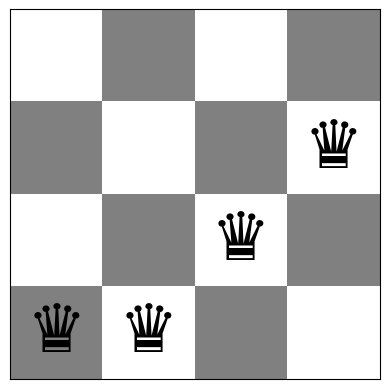

Queens (left to right) are at rows: [3 3 2 1]
Number of conflicts: 4


In [ ]:
board = random_board(4)

show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")

A board $4 \times 4$ with no conflicts:

Board with 0 conflicts.


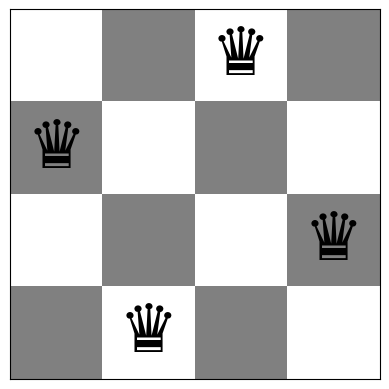

In [ ]:
board = [1,3,0,2]
show_board(board)

# Tasks

## General [10 Points]

1. Make sure that you use the latest version of this notebook. Sync your forked repository and pull the latest revision.
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement intelligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formatted professionally.
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your PDF file is readable. For example, long lines are cut off in the PDF file. You don't have control over page breaks, so do not worry about these.
4. Document your code. Add a short discussion of how your implementation works and your design choices.

## Task 1: Steepest-ascend Hill Climbing Search [30 Points]

Calculate the objective function for all local moves (see definition of local moves above) and always choose the best among all local moves. If there are no local moves that improve the objective, then you have reached a local optimum.

In [ ]:
# Code and description go here
def column_check(board, column) :
  current_conflicts = conflicts(board)
  best_row = board[column]
  for row in range(len(board)):
    board[column] = row
    conflicts_check = conflicts(board)
    if conflicts_check < current_conflicts:
      current_conflicts = conflicts_check
      best_row = row
  board[column] = best_row
  return board

def steepest_ascend_hill_climbing(board) :
  current_board = board
  current_conflicts = conflicts(board)
  for column in range(len(board)):
    if conflicts(current_board) == 0:
      return current_board
    current_board = column_check(board, column)
  return current_board

In [ ]:
steepest_ascend_hill_climbing(board)
conflicts(board)

0

Board with 0 conflicts.


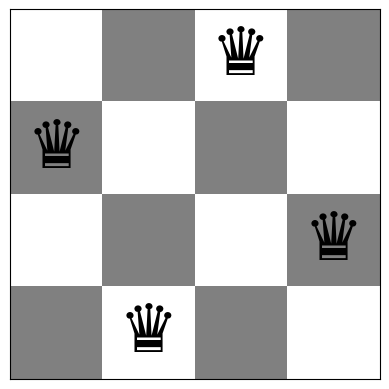

Queens (left to right) are at rows: [1, 3, 0, 2]
Number of conflicts: 0


In [ ]:
show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")

## Task 2: Stochastic Hill Climbing 1 [10 Points]

Chooses randomly from among all uphill moves till you have reached a local optimum.

In [ ]:

x = list(range(0, len(board)))
x

[0, 1, 2, 3]

In [ ]:
# Code and description go here
import random

def column_check_stochastic(board, column) :
  current_conflicts = conflicts(board)
  best_row = board[column]
  row_list = list(range(0, len(board)))
  for i in range(len(board), 0, -1):
    row_to_pop = random.randrange(i)
    rand_row = row_list.pop(row_to_pop)
    board[column] = rand_row
    conflicts_check = conflicts(board)
    if conflicts_check < current_conflicts:
      current_conflicts = conflicts_check
      best_row = rand_row
  board[column] = best_row
  return board

def stochastic_hill_climbing(board) :
  current_board = board
  current_conflicts = conflicts(board)
  for column in range(len(board)):
    if conflicts(current_board) == 0:
      return current_board
    current_board = column_check_stochastic(board, column)
  return current_board

Board with 4 conflicts.


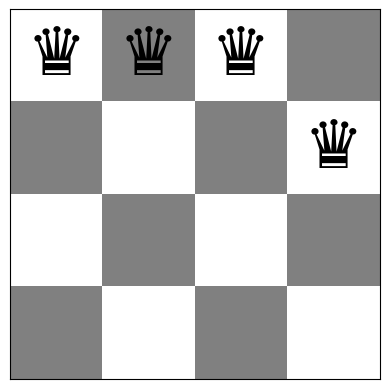

Queens (left to right) are at rows: [0 0 0 1]
Number of conflicts: 4


In [ ]:
board = random_board(4)

show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")

In [ ]:
# Code and description go here
stochastic_hill_climbing(board)
conflicts(board)

1

Board with 1 conflicts.


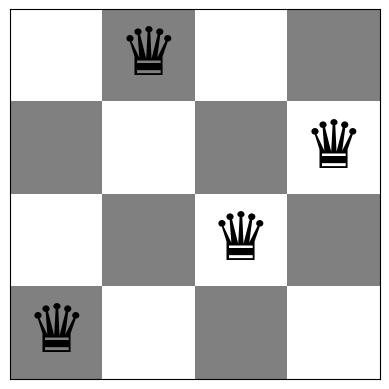

Queens (left to right) are at rows: [3 0 2 1]
Number of conflicts: 1


In [ ]:
show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")

## Task 3: Stochastic Hill Climbing 2 [20 Points]

A popular version of stochastic hill climbing generates only a single random local neighbor at a time and accept it if it has a better objective function value than the current state. This is very efficient if each state has many possible successor states. This method is called "First-choice hill climbing" in the textbook.

__Notes:__

* Detecting local optima is tricky! You can, for example, stop if you were not able to improve the objective function during the last $x$ tries.

In [ ]:
# Code and description go here
# Code and description go here
import random

def column_check_stochastic_2(board, column) :
  current_conflicts = conflicts(board)
  best_row = board[column]
  row_list = list(range(0, len(board)))
  for i in range(len(board), 0, -1):
    row_to_pop = random.randrange(i)
    rand_row = row_list.pop(row_to_pop)
    board[column] = rand_row
    conflicts_check = conflicts(board)
    if conflicts_check < current_conflicts:
      current_conflicts = conflicts_check
      best_row = rand_row
      board[column] = best_row
      return board
  board[column] = best_row
  return board

def stochastic_hill_climbing_2(board) :
  current_board = board
  current_conflicts = conflicts(board)
  for column in range(len(board)):
    if conflicts(current_board) == 0:
      return current_board
    current_board = column_check_stochastic(board, column)
  return current_board

Board with 2 conflicts.


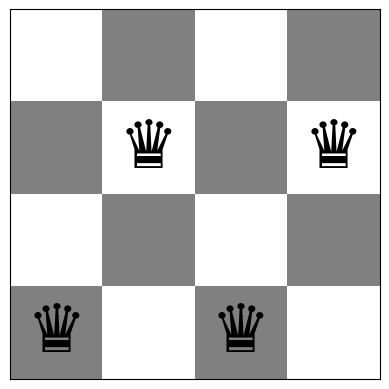

Queens (left to right) are at rows: [3 1 3 1]
Number of conflicts: 2


In [ ]:
board = random_board(4)

show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")

In [ ]:
# Code and description go here
stochastic_hill_climbing_2(board)
conflicts(board)

1

Board with 1 conflicts.


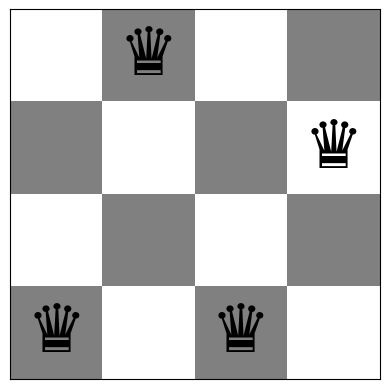

Queens (left to right) are at rows: [3 0 3 1]
Number of conflicts: 1


In [ ]:
show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")

## Task 4: Hill Climbing Search with Random Restarts [10 Points]

Hill climbing will often end up in local optima. Restart the each of the three hill climbing algorithm up to 100 times with a random board to find a better (hopefully optimal) solution. Note that restart just means to run the algorithm several times starting with a new random board.

First I create the dictionaries to hold the info for the number of conflicts and the time each run takes. Looking ahead to task 6 I go ahead and create the dictions for n=4 and n=8.

In [ ]:
# Code and description go here
import numpy as np
conflicts_performance_4 = {
    "Steepest asc. HC" : np.zeros((100,), dtype=int),
    "Stochastic HC 1" : np.zeros((100,), dtype=int),
    "Stochastic HC 2" : np.zeros((100,), dtype=int),
    "Simulated Annealing" : np.zeros((100,), dtype=int)
}
time_performance_4 = {
    "Steepest asc. HC" : np.zeros((100,), dtype=float),
    "Stochastic HC 1" : np.zeros((100,), dtype=float),
    "Stochastic HC 2" : np.zeros((100,), dtype=float),
    "Simulated Annealing" : np.zeros((100,), dtype=float)
}
conflicts_performance_8 = {
    "Steepest asc. HC" : np.zeros((100,), dtype=int),
    "Stochastic HC 1" : np.zeros((100,), dtype=int),
    "Stochastic HC 2" : np.zeros((100,), dtype=int),
    "Simulated Annealing" : np.zeros((100,), dtype=int)
}
time_performance_8 = {
    "Steepest asc. HC" : np.zeros((100,), dtype=float),
    "Stochastic HC 1" : np.zeros((100,), dtype=float),
    "Stochastic HC 2" : np.zeros((100,), dtype=float),
    "Simulated Annealing" : np.zeros((100,), dtype=float)
}

This first block of code is to populate the data for the steepest ascending hill performance on boards where n = 4. I am separating all of them into their own code block for ease of troubleshooting.

In [ ]:
import time

for i in range(100):
  board = random_board(4)
  # get the start time
  start_time = time.time()
  # run the algorithm
  steepest_ascend_hill_climbing(board)
  # get the end time
  end_time = time.time()
  # use the start and end times to get the total time elapsed and multiply by 1000 to get the time in milliseconds
  total_time = (end_time - start_time) * 1000
  # update the performace arrays
  time_performance_4['Steepest asc. HC'][i] = total_time
  conflicts_performance_4['Steepest asc. HC'][i] = conflicts(board)


In [ ]:
for i in range(100):
  board = random_board(4)
  # get the start time
  start_time = time.time()
  # run the algorithm
  stochastic_hill_climbing(board)
  # get the end time
  end_time = time.time()
  # use the start and end times to get the total time elapsed and multiply by 1000 to get the time in milliseconds
  total_time = (end_time - start_time) * 1000
  # update the performace arrays
  time_performance_4['Stochastic HC 1'][i] = total_time
  conflicts_performance_4['Stochastic HC 1'][i] = conflicts(board)

In [ ]:
for i in range(100):
  board = random_board(4)
  # get the start time
  start_time = time.time()
  # run the algorithm
  stochastic_hill_climbing_2(board)
  # get the end time
  end_time = time.time()
  # use the start and end times to get the total time elapsed and multiply by 1000 to get the time in milliseconds
  total_time = (end_time - start_time) * 1000
  # update the performace arrays
  time_performance_4['Stochastic HC 2'][i] = total_time
  conflicts_performance_4['Stochastic HC 2'][i] = conflicts(board)

In [ ]:
mean_time_performance_4 = np.mean(list(time_performance_4.values()), axis = 1)
mean_time_performance_4

array([0.29225349, 0.208745  , 0.27596951, 0.        ])

In [ ]:
mean_conflicts_performance_4 = np.mean(list(conflicts_performance_4.values()), axis = 1)
mean_conflicts_performance_4

array([1.08, 0.88, 1.03, 0.  ])

More analysis will be done in Tasks 5 and 6 so I'll keep this brief. From the current performances I would say that steepest ascend hill climbing is the best of the 3. It has the fastest average time and is tied with stochastic hill climbing 1 for best average conflicts performance.

## Task 5: Simulated Annealing [10 Points]

Simulated annealing is a form of stochastic hill climbing that avoid local optima by also allowing downhill moves with a probability proportional to a temperature. The temperature is decreased in every iteration following an annealing schedule. You have to experiment with the annealing schedule (Google to find guidance on this).


1. Implement simulated annealing for the n-Queens problem.
2. Compare the performance with the previous algorithms.
2. Discuss your choice of annealing schedule.

For temperature I chose to simply go from n to 1 where n is supplied as the "schedule" in the parameters.

In [ ]:
# Code and description go here
import random
import math
def simulated_annealing(board, schedule) :
  current_board = board
  for temperature in range(schedule, 0, -1):
    current_conflicts = conflicts(board)
    if current_conflicts == 0:
      return current_board
    rand_row = random.randrange(len(board))
    rand_column = random.randrange(len(board))
    current_row = board[rand_column]
    current_board[rand_column] = rand_row
    new_conflicts = conflicts(current_board)
    conflicts_difference = new_conflicts - current_conflicts

    rho = math.exp(-conflicts_difference/temperature)
    if conflicts_difference < 0:
      continue
    elif(np.random.uniform(1,0,1) < rho):
        continue
    else:
      current_board[rand_column] = current_row
      continue
  return current_board

For the implementation I am using temperature from 1000 to 1. I experimented with a few others but found that if I start too small then it would usually end with lots of conflicts.

In [ ]:
for i in range(100):
  board = random_board(4)
  # get the start time
  start_time = time.time()
  # run the algorithm
  simulated_annealing(board, 1000)
  # get the end time
  end_time = time.time()
  # use the start and end times to get the total time elapsed and multiply by 1000 to get the time in milliseconds
  total_time = (end_time - start_time) * 1000
  # update the performace arrays
  time_performance_4['Simulated Annealing'][i] = total_time
  conflicts_performance_4['Simulated Annealing'][i] = conflicts(board)

In [ ]:
mean_time_performance_4 = np.mean(list(time_performance_4.values()), axis = 1)
mean_time_performance_4

array([0.29225349, 0.208745  , 0.27596951, 7.95030594])

In [ ]:
mean_conflicts_performance_4 = np.mean(list(conflicts_performance_4.values()), axis = 1)
mean_conflicts_performance_4

array([1.08, 0.88, 1.03, 0.02])

In [ ]:
optimal_solutions_4 = np.count_nonzero(list(conflicts_performance_4.values()), axis = 1)
for i in range(4):
  optimal_solutions_4[i] = 100 - optimal_solutions_4[i]
optimal_solutions_4

array([21, 31, 22, 99])

## Task 6: Compare Performance [10 Points]

Compare the algorithm using runtime and objective function values. Use boards of size 4 and 8 to explore how the different algorithms perform. Make sure that you run the algorithms for each board size several times (at least 100 times) with different starting boards and report averages.

Complete the following table

| Algorithm           | Board size | Avg. Run time | Avg. number of conflicts | % of runs ending in optimal solution  |
| ------------------- | ---------- | ------------- | --------------------------------- | - |
| Steepest asc. HC    |     4      |       0.34902573        |     1.08                              |  21 |
| Stochastic HC 1     |     4      |     0.27250767          |     0.92                              | 26  |
| Stochastic HC 2     |     4      |    0.22810459           |     1.03                              | 21  |
| Simulated Annealing |     4      |     4.96530533          |       0                            | 100  |
| Steepest asc. HC    |     8      |       1.09652996        |        1.75                           |  5 |
| Stochastic HC 1     |     8      |     1.12043619          |      1.68                             |  6 |
| Stochastic HC 2     |     8      |      1.20073318         |      1.66                             |  7 |
| Simulated Annealing |     8      |      45.87680817         |          6.46                         |  0 |


Add the used code and the answer to the following questions below.

* How do the algorithms scale with problem size? You will need to run more board sizes. You can add the results to the table above and show the result as a chart.

* What is the largest board each algorithm can solve in a reasonable amount time?

Hint: See [Profiling Python Code](../HOWTOs/profiling_code.ipynb) for help about how to measure runtime in Python.

The code below was used to fill in the table above. I was really surprised by how well the simulated annealing did for boards of size 4 but managed to fall off so hard for boards of size 8. I even did a practice round of upping my temperature to start at 10,000 instead of 1,000 and the average time went up to 468 milliseconds but average conflicts only dropped to 6.24.

In [ ]:
for i in range(100):
  board = random_board(8)
  # get the start time
  start_time = time.time()
  # run the algorithm
  steepest_ascend_hill_climbing(board)
  # get the end time
  end_time = time.time()
  # use the start and end times to get the total time elapsed and multiply by 1000 to get the time in milliseconds
  total_time = (end_time - start_time) * 1000
  # update the performace arrays
  time_performance_8['Steepest asc. HC'][i] = total_time
  conflicts_performance_8['Steepest asc. HC'][i] = conflicts(board)


In [ ]:
for i in range(100):
  board = random_board(8)
  # get the start time
  start_time = time.time()
  # run the algorithm
  stochastic_hill_climbing(board)
  # get the end time
  end_time = time.time()
  # use the start and end times to get the total time elapsed and multiply by 1000 to get the time in milliseconds
  total_time = (end_time - start_time) * 1000
  # update the performace arrays
  time_performance_8['Stochastic HC 1'][i] = total_time
  conflicts_performance_8['Stochastic HC 1'][i] = conflicts(board)

In [ ]:
for i in range(100):
  board = random_board(8)
  # get the start time
  start_time = time.time()
  # run the algorithm
  stochastic_hill_climbing_2(board)
  # get the end time
  end_time = time.time()
  # use the start and end times to get the total time elapsed and multiply by 1000 to get the time in milliseconds
  total_time = (end_time - start_time) * 1000
  # update the performace arrays
  time_performance_8['Stochastic HC 2'][i] = total_time
  conflicts_performance_8['Stochastic HC 2'][i] = conflicts(board)

In [ ]:
for i in range(100):
  board = random_board(8)
  # get the start time
  start_time = time.time()
  # run the algorithm
  simulated_annealing(board, 1000)
  # get the end time
  end_time = time.time()
  # use the start and end times to get the total time elapsed and multiply by 1000 to get the time in milliseconds
  total_time = (end_time - start_time) * 1000
  # update the performace arrays
  time_performance_8['Simulated Annealing'][i] = total_time
  conflicts_performance_8['Simulated Annealing'][i] = conflicts(board)

In [ ]:
mean_time_performance_8 = np.mean(list(time_performance_8.values()), axis = 1)
mean_time_performance_8

array([ 1.95541382,  2.28914261,  2.0532918 , 49.96670008])

In [ ]:
mean_conflicts_performance_8 = np.mean(list(conflicts_performance_8.values()), axis = 1)
mean_conflicts_performance_8

array([1.86, 1.59, 1.84, 6.36])

In [ ]:
optimal_solutions_8 = np.count_nonzero(list(conflicts_performance_8.values()), axis = 1)
for i in range(4):
  optimal_solutions_8[i] = 100 - optimal_solutions_8[i]
optimal_solutions_8

array([1, 7, 3, 0])

## Advanced task: Exploring other Local Moves

* __Graduate students__ need to complete this task [10 points]
* __Undergraduate students__ can attempt this as a bonus task [max +5 bonus points].

Implement a few different local moves. Implement:

* moving one queen only one square at a time
* switching two columns
* move two queens at a time

Compare the performance of these moves for the 8-Queens problem using your stochastic hill climbing 2 implementation from above. Also consider mixing the use of several types of local moves (e.g., move one queen and moving two queens).

Describe what you find out about how well these moves and combinations of these moves work.

In [ ]:
def column_check_move_only_one_square(board, column) :
  current_conflicts = conflicts(board)
  best_row = board[column]
  current_row = board[column]
  for i in range(2):
    if i == 0 and current_row == 0:
      continue
    elif i == 0:
      board[column] = board[column] - 1
      conflicts_check = conflicts(board)
    elif i == 1 and current_row == len(board) - 1:
      continue
    else:
      board[column] = board[column] + 1
      conflicts_check = conflicts(board)
    if conflicts_check < current_conflicts:
      current_conflicts = conflicts_check
      best_row = board[column]
    board[column] = current_row
  board[column] = best_row
  return board

def move_only_one_square_hill_climbing(board) :
  current_board = board
  current_conflicts = conflicts(board)
  for column in range(len(board)):
    if conflicts(current_board) == 0:
      return current_board
    current_board = column_check_move_only_one_square(board, column)
  return current_board

In [ ]:
def swap_columns(board, column) :
  current_conflicts = conflicts(board)
  best_rows = [0,0]
  current_rows = [0,0]
  column_to_swap = column
  for i in range(column + 1, len(board)):
    current_rows[0] = board[column]
    current_rows[1] = board[i]
    board[column] = current_rows[1]
    board[i] = current_rows[0]
    conflicts_check = conflicts(board)
    if conflicts_check < current_conflicts:
      current_conflicts = conflicts_check
      column_to_swap = i
      best_rows[0] = current_rows[0]
      best_rows[1] = current_rows[1]
    board[column] = current_rows[0]
    board[i] = current_rows[1]
  if column_to_swap != column:
    board[column] = best_rows[1]
    board[column_to_swap] = best_rows[0]
  return board

def swap_columns_hill_climbing(board) :
  current_board = board
  current_conflicts = conflicts(board)
  for column in range(len(board)):
    if conflicts(current_board) == 0:
      return current_board
    current_board = swap_columns(board, column)
  return current_board

In [ ]:
def move_two_queens(board, column) :
  current_conflicts = conflicts(board)
  current_row_one = board[column]
  current_row_two = 0
  column_list = list(range(0, len(board)))
  rand_column = column_list.pop(column)
  for i in range(len(board)-1, 0, -1):
    column_to_pop = random.randrange(i)
    rand_column = column_list.pop(column_to_pop)
    current_row_two = board[rand_column]
    board[column] = random.randrange(len(board))
    board[rand_column] = random.randrange(len(board))
    conflicts_check = conflicts(board)
    if conflicts_check < current_conflicts:
      return board
    board[column] = current_row_one
    board[rand_column] = current_row_two
  return board

def move_two_queens_hill_climbing(board) :
  current_board = board
  current_conflicts = conflicts(board)
  for column in range(len(board)):
    if conflicts(current_board) == 0:
      return current_board
    current_board = move_two_queens(board, column)
  return current_board

In [ ]:
conflicts_performance_8_extra = {
    "Stochastic HC 2" : np.zeros((100,), dtype=int),
    "Move only 1 square" : np.zeros((100,), dtype=int),
    "Swap columns" : np.zeros((100,), dtype=int),
    "Move 2 queens" : np.zeros((100,), dtype=int)
}
time_performance_8_extra = {
    "Stochastic HC 2" : np.zeros((100,), dtype=float),
    "Move only 1 square" : np.zeros((100,), dtype=float),
    "Swap columns" : np.zeros((100,), dtype=float),
    "Move 2 queens" : np.zeros((100,), dtype=float)
}

In [ ]:
conflicts_performance_8_extra["Stochastic HC 2"] = conflicts_performance_8["Stochastic HC 2"]
conflicts_performance_8_extra["Stochastic HC 2"]

array([2, 2, 3, 2, 1, 2, 2, 2, 3, 3, 1, 2, 2, 2, 1, 2, 1, 2, 2, 3, 2, 2,
       3, 2, 1, 2, 2, 2, 2, 2, 1, 2, 3, 3, 1, 2, 2, 3, 2, 1, 1, 1, 1, 1,
       2, 3, 2, 2, 2, 1, 0, 3, 3, 1, 2, 2, 1, 1, 3, 2, 2, 3, 3, 1, 2, 1,
       1, 0, 2, 0, 2, 2, 1, 1, 1, 2, 4, 2, 3, 2, 1, 2, 2, 1, 3, 2, 2, 1,
       1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2])

In [ ]:
time_performance_8_extra["Stochastic HC 2"] = time_performance_8["Stochastic HC 2"]
time_performance_8_extra["Stochastic HC 2"]

array([1.94501877, 1.89995766, 1.93929672, 2.45475769, 1.72615051,
       1.86157227, 1.81055069, 2.47144699, 1.91450119, 1.92070007,
       1.84679031, 6.30378723, 1.92189217, 1.93786621, 1.93238258,
       2.11811066, 1.90401077, 1.90544128, 1.90639496, 1.94168091,
       2.21085548, 2.57992744, 1.88279152, 1.81913376, 1.97339058,
       1.8286705 , 1.94478035, 1.77907944, 1.08575821, 1.3961792 ,
       1.81627274, 1.82819366, 2.06494331, 1.9774437 , 1.82199478,
       1.87158585, 1.83463097, 1.89709663, 1.83796883, 1.85656548,
       4.01639938, 1.87015533, 4.33778763, 1.9364357 , 2.08497047,
       2.48813629, 1.97672844, 2.10690498, 1.99198723, 1.93190575,
       1.74975395, 2.1481514 , 1.93095207, 1.94430351, 1.91712379,
       1.90615654, 1.91760063, 1.95503235, 1.95217133, 1.92952156,
       4.07385826, 1.97148323, 1.88446045, 1.8966198 , 1.98721886,
       1.89948082, 1.9967556 , 1.53183937, 1.95503235, 1.92165375,
       1.96051598, 1.94835663, 2.01320648, 2.00676918, 2.00819

In [ ]:
for i in range(100):
  board = random_board(8)
  # get the start time
  start_time = time.time()
  # run the algorithm
  move_only_one_square_hill_climbing(board)
  # get the end time
  end_time = time.time()
  # use the start and end times to get the total time elapsed and multiply by 1000 to get the time in milliseconds
  total_time = (end_time - start_time) * 1000
  # update the performace arrays
  time_performance_8_extra['Move only 1 square'][i] = total_time
  conflicts_performance_8_extra['Move only 1 square'][i] = conflicts(board)

In [ ]:
for i in range(100):
  board = random_board(8)
  # get the start time
  start_time = time.time()
  # run the algorithm
  swap_columns_hill_climbing(board)
  # get the end time
  end_time = time.time()
  # use the start and end times to get the total time elapsed and multiply by 1000 to get the time in milliseconds
  total_time = (end_time - start_time) * 1000
  # update the performace arrays
  time_performance_8_extra['Swap columns'][i] = total_time
  conflicts_performance_8_extra['Swap columns'][i] = conflicts(board)

In [ ]:
for i in range(100):
  board = random_board(8)
  # get the start time
  start_time = time.time()
  # run the algorithm
  move_two_queens_hill_climbing(board)
  # get the end time
  end_time = time.time()
  # use the start and end times to get the total time elapsed and multiply by 1000 to get the time in milliseconds
  total_time = (end_time - start_time) * 1000
  # update the performace arrays
  time_performance_8_extra['Move 2 queens'][i] = total_time
  conflicts_performance_8_extra['Move 2 queens'][i] = conflicts(board)

In [ ]:
mean_time_performance_8_extra = np.mean(list(time_performance_8_extra.values()), axis = 1)
mean_time_performance_8_extra

array([2.0532918 , 0.47088623, 0.64859152, 0.97754717])

In [ ]:
mean_conflicts_performance_8_extra = np.mean(list(conflicts_performance_8_extra.values()), axis = 1)
mean_conflicts_performance_8_extra

array([1.84, 3.95, 4.78, 2.57])

In [ ]:
optimal_solutions_8_extra = np.count_nonzero(list(conflicts_performance_8_extra.values()), axis = 1)
for i in range(4):
  optimal_solutions_8_extra[i] = 100 - optimal_solutions_8_extra[i]
optimal_solutions_8_extra

array([3, 0, 0, 0])

Unsurprisingly, none of the new ones performed too well. None of the 3 new ones managed a single optimal solution with a board size of 8. They are faster than the stochastic 2 implementation though. The best of the new bunch appears to be the implementation where you move 2 queens at once. With an average conflicts of 2.52 it doesn't do too bad. All 3 implementations outperform simulated annealing at a board size of 8 though.

## More things to do

Implement a Genetic Algorithm for the n-Queens problem.

In [ ]:
# Code and description go here
!pip install nbconvert

from google.colab import drive
drive.mount('/content/drive')
!jupyter nbconvert --to html /content/drive/MyDrive/Colab\ Notebooks/n_queens.ipynb

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/n_queens.ipynb to html
[NbConvertApp] Writing 790871 bytes to /content/drive/MyDrive/Colab Notebooks/n_queens.html
